# STAT303-2: Assignment 3

In [1]:
#Importing Packages
import pandas as  pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

sns.set(style = "ticks", palette = "bright", rc = {'figure.figsize': (12,7)})

#Importing Data
feature_test = pd.read_csv("house_feature_test.csv")
feature_train = pd.read_csv("house_feature_train.csv")
price_test = pd.read_csv("house_price_test.csv")
price_train = pd.read_csv("house_price_train.csv")
housing_train = pd.read_csv("Austin_Affordable_Housing_Train.csv")
housing_test = pd.read_csv("Austin_Affordable_Housing_Test.csv")

## Part 1
The datasets *house_feature_train.csv*, *house_price_train.csv*, *house_feature_test.csv*, and *house_price_test.csv* provide data on housing features and prices. 

This part is worth 23 points overall.

In [2]:
feature_test

,house_id,house_age,distance_MRT,number_convenience_stores,latitude,longitude
0,393,16.9,967.40000,4,24.98872,121.53408
1,226,16.5,4082.01500,0,24.94155,121.50381
2,203,15.6,289.32480,5,24.98203,121.54348
3,341,13.0,750.07040,2,24.97371,121.54951
4,287,19.2,461.10160,5,24.95425,121.53990
...,...,...,...,...,...,...
109,360,32.9,87.30222,10,24.98300,121.54022
110,397,13.1,1164.83800,4,24.99156,121.53406
111,67,8.5,104.81010,5,24.96674,121.54067
112,357,0.0,338.96790,9,24.96853,121.54413


In [3]:
price_test

,house_id,house_price
0,393,1624.09
1,226,163.84
2,203,2125.21
3,341,1369.00
4,287,1082.41
...,...,...
109,360,2218.41
110,397,1036.84
111,67,3226.24
112,357,2016.01


#### (1a) 
Using house_feature_train.csv and house_price_train.csv, fit a multiple linear regression model without transformation to predict *house_price* based on *distance_MRT*, *latitude*, and *longitude*, *house_age*, and *number_convenience_stores*. 

Print the model summary. What is the R^2 value? 

*(2 points for code, 1 point for answer)*

In [4]:
train = pd.merge(feature_train, price_train)
train

,house_id,house_age,distance_MRT,number_convenience_stores,latitude,longitude,house_price
0,210,5.2,390.5684,5,24.97937,121.54245,2724.84
1,190,35.3,616.5735,8,24.97945,121.53642,1789.29
2,328,15.9,1497.7130,3,24.97003,121.51696,556.96
3,5,7.1,2175.0300,3,24.96305,121.51254,1030.41
4,412,8.1,104.8101,5,24.96674,121.54067,2756.25
...,...,...,...,...,...,...,...
270,251,31.7,1159.4540,0,24.94960,121.53018,190.44
271,359,5.6,2408.9930,0,24.95505,121.55964,610.09
272,182,13.5,2147.3760,3,24.96299,121.51284,556.96
273,329,13.6,4197.3490,0,24.93885,121.50383,368.64


In [5]:
#Creating and fitting model
ols_object = smf.ols(formula = 'house_price ~ distance_MRT + latitude + longitude + house_age + number_convenience_stores', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     70.32
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.57e-47
Time:                        21:33:30   Log-Likelihood:                -2187.9
No. Observations:                 275   AIC:                             4388.
Df Residuals:                     269   BIC:                             4410.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -4.833e+05   5.79e+05     -0.835      0.404   -1.62e+06    6.56e+05
distance_MRT                 -0.2659      0.068     -3.886      0.000      -0.401      -0.131
latitude                   1.926e+04   4362.392      4.414      0.000    1.07e+04    2.78e+04
longitude                    35.8774   4570.578      0.008      0.994   -8962.778    9034.532
house_age                   -23.1472      3.786     -6.113      0.000     -30.602     -15.692
number_convenience_stores   111.8909     17.743      6.306      0.000      76.959     146.823
==============================================================================
Omnibus:                       62.033   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.606
Skew:                           1.195   Prob(JB):                     2.14e-25
Kurtosis:                       5.049   Cond. No.                     2.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The R^2 value is 0.567.**

#### (1b) 
Obtain the residuals and plot them separately against fitted values and each of the five feature variables. Make one plot including the 6 subplots. 

*(3 points for visualization)*

In [6]:
pred_price = model.predict(feature_train)

Text(0.5, 0, 'Fitted values')

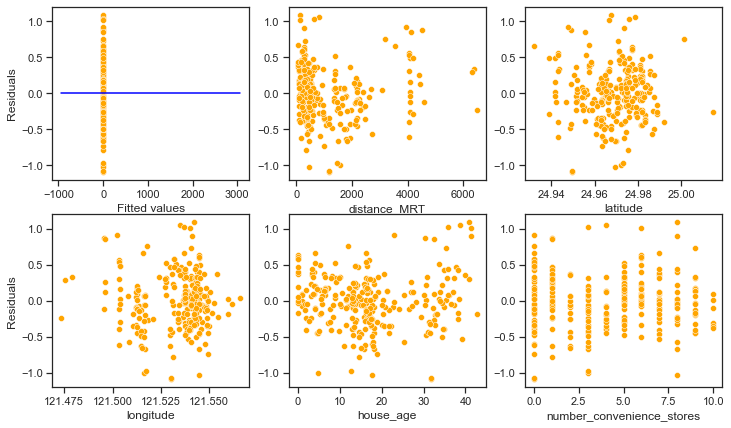

In [13]:
#Plotting residuals plots
fig, ax = plt.subplots(2,3)
sns.scatterplot(x = model.fittedvalues, y=model.resid, color = 'orange', ax = ax[0,0])
sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue', ax = ax[0,0])
sns.scatterplot(x = feature_train.distance_MRT, y=model.resid, color = 'orange', ax = ax[0,1])
sns.scatterplot(x = feature_train.latitude, y=model.resid, color = 'orange', ax = ax[0,2])
sns.scatterplot(x = feature_train.longitude, y=model.resid, color = 'orange', ax = ax[1,0])
sns.scatterplot(x = feature_train.house_age, y=model.resid, color = 'orange', ax = ax[1,1])
sns.scatterplot(x = feature_train.number_convenience_stores, y=model.resid, color = 'orange', ax = ax[1,2])

plt.setp(ax[:,0], ylabel = 'Residuals')
ax[0,0].set_xlabel('Fitted values')

#### (1c) 
Comment on the plot of residuals against fitted values. Does the model violate the assumption of linearity? Does the model violate constant variance assumption? 

*(3 points for answer)*

**Yes, according to the plot of residuals against fitted values, the model does violate the assumption of linearity because there are clearly more data points below zero than above.**

#### (1d) 
Comment on the plot of residuals against the predictor variables. On the basis of these plots, should any further modifications of the regression model be attempted? 

*(2 points for answer)*

**When the residuals are plotted against the predictor variables, it appears that some relationships with certain predictor variables (like longitude and distance_MRT) may violate the assumption of linearity. As a result, we should further modify the regression model.**

#### (1e) 
Calculate the RMSE using the test datasets for the model constructed in (a). 

*(2 points for code)*

In [8]:
test = pd.merge(feature_test, price_test)
test

,house_id,house_age,distance_MRT,number_convenience_stores,latitude,longitude,house_price
0,393,16.9,967.40000,4,24.98872,121.53408,1624.09
1,226,16.5,4082.01500,0,24.94155,121.50381,163.84
2,203,15.6,289.32480,5,24.98203,121.54348,2125.21
3,341,13.0,750.07040,2,24.97371,121.54951,1369.00
4,287,19.2,461.10160,5,24.95425,121.53990,1082.41
...,...,...,...,...,...,...,...
109,360,32.9,87.30222,10,24.98300,121.54022,2218.41
110,397,13.1,1164.83800,4,24.99156,121.53406,1036.84
111,67,8.5,104.81010,5,24.96674,121.54067,3226.24
112,357,0.0,338.96790,9,24.96853,121.54413,2016.01


In [9]:
np.sqrt(((test['house_price'] - pred_price)**2).mean())

1178.0680597817918

**The RMSE for the model based on the combined test data is 1178.068.**

#### (1f) 
Using appropriate transformation(s) and/or variable interaction(s), update the model in (a) to obtain a model that has an R-squared of at least 80%, and a RMSE (Root mean squared error) of at max \$350k on test data. 

Print the model summary and report the R-squared, and RMSE on test data. 

*(5 points for code)*

Note:

(1) House prices are provided in thousands of dollars. A value of 556 in the *house_price* column indicates a house price of \$556k. \
(2) The test datasets are *house_feature_test.csv* and *house_price_test.csv*. \
(3) R-squared is computed on training data, and RMSE is computed on test data.

In [43]:
#Creating and fitting a new model
ols_object = smf.ols(formula = 'np.log(house_price) ~ np.log(distance_MRT) + latitude + I(latitude**2) + I(latitude**3) + longitude + I(longitude**2) + house_age + I(house_age**2)+ number_convenience_stores + I(number_convenience_stores**2) + I(number_convenience_stores**3)', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(house_price)   R-squared:                       0.833
Model:                             OLS   Adj. R-squared:                  0.826
Method:                  Least Squares   F-statistic:                     119.4
Date:                 Wed, 09 Feb 2022   Prob (F-statistic):           1.77e-95
Time:                         22:16:11   Log-Likelihood:                -75.322
No. Observations:                  275   AIC:                             174.6
Df Residuals:                      263   BIC:                             218.0
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.501e+08   5.42e+07      2.770      0.006    4.34e+07    2.57e+08
np.log(distance_MRT)                 -0.2848      0.035     -8.193      0.000      -0.353      -0.216
latitude                          -1.824e+07    6.5e+06     -2.805      0.005    -3.1e+07   -5.44e+06
I(latitude ** 2)                   7.304e+05    2.6e+05      2.805      0.005    2.18e+05    1.24e+06
I(latitude ** 3)                  -9750.1988   3476.451     -2.805      0.005   -1.66e+04   -2904.981
longitude                          2.902e+04   1.72e+04      1.692      0.092   -4754.629    6.28e+04
I(longitude ** 2)                  -119.3557     70.563     -1.691      0.092    -258.295      19.584
house_age                            -0.0458      0.007     -6.763      0.000      -0.059      -0.032
I(house_age ** 2)                     0.0009      0.000      5.355      0.000       0.001       0.001
number_convenience_stores             0.0728      0.061      1.200      0.231      -0.047       0.192
I(number_convenience_stores ** 2)    -0.0003      0.016     -0.020      0.984      -0.032       0.031
I(number_convenience_stores ** 3)    -0.0005      0.001     -0.447      0.655      -0.003       0.002
==============================================================================
Omnibus:                        4.384   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.450
Skew:                          -0.195   Prob(JB):                        0.108
Kurtosis:                       3.486   Cond. No.                     5.97e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
pred_test = model.predict(test)

In [45]:
#Calculating the RMSE
np.sqrt(((test['house_price'] - pred_test)**2).mean())

1590.7477617717361

In [17]:
train['log_houseprice'] = np.log(train.house_price)

In [18]:
train.columns

Index(['house_id', 'house_age', 'distance_MRT', 'number_convenience_stores',
       'latitude', 'longitude', 'house_price', 'log_houseprice'],
      dtype='object')

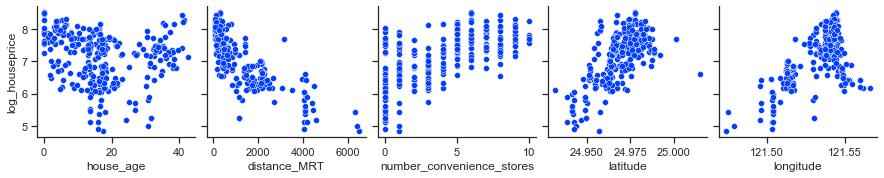

In [19]:
sns.pairplot(train, y_vars = ['log_houseprice'], x_vars = [ 'house_age', 'distance_MRT', 'number_convenience_stores', 'latitude', 'longitude'])

0.40617323311236464
0.4182921875163489
0.4276293180032411


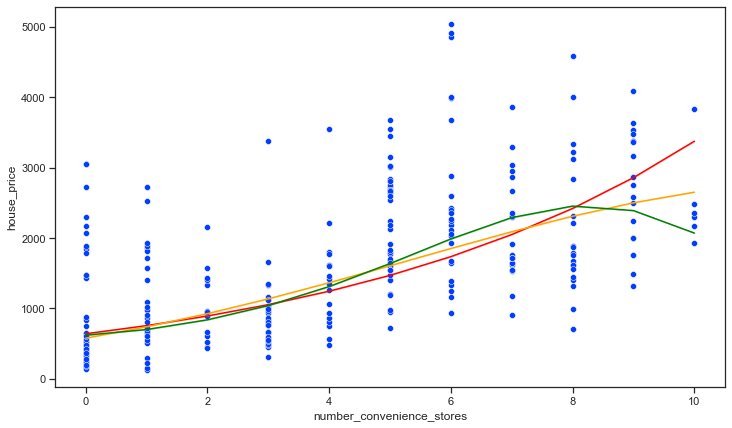

In [35]:
model = smf.ols('np.log(house_price) ~ number_convenience_stores', data = train).fit()
sns.scatterplot(x = "number_convenience_stores", y = "house_price", data = train)
sns.lineplot(x = "number_convenience_stores", y =  np.exp(model.predict(train)), data = train, color = "red")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ number_convenience_stores + I(number_convenience_stores**2)', data = train).fit()
sns.lineplot(x = "number_convenience_stores", y =  np.exp(model.predict(train)), data = train, color = "orange")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ number_convenience_stores + I(number_convenience_stores**2) + I(number_convenience_stores**3)', data = train).fit()
sns.lineplot(x = "number_convenience_stores", y =  np.exp(model.predict(train)), data = train, color = "green")
print(model.rsquared)

0.37868499118422905
0.4717500767108802
0.47180107267449267


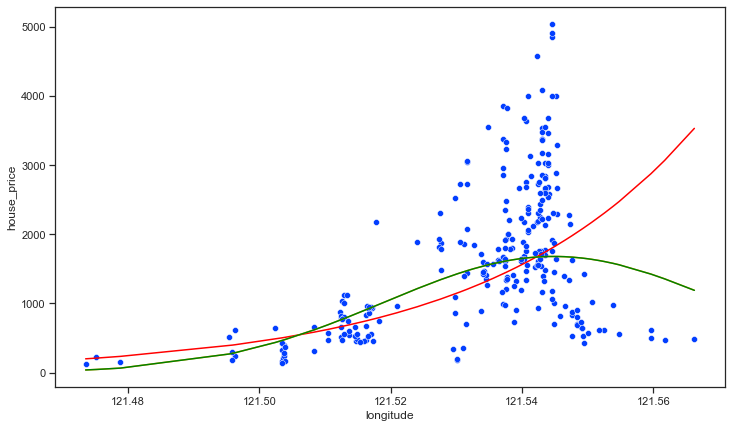

In [31]:
model = smf.ols('np.log(house_price) ~ longitude', data = train).fit()
sns.scatterplot(x = "longitude", y = "house_price", data = train)
sns.lineplot(x = "longitude", y =  np.exp(model.predict(train)), data = train, color = "red")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ longitude + I(longitude**2)', data = train).fit()
sns.lineplot(x = "longitude", y =  np.exp(model.predict(train)), data = train, color = "orange")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ longitude + I(longitude**2) + I(longitude**3)', data = train).fit()
sns.lineplot(x = "longitude", y =  np.exp(model.predict(train)), data = train, color = "green")
print(model.rsquared)

0.45096836838527987
0.5179925883008687
0.531018355076261


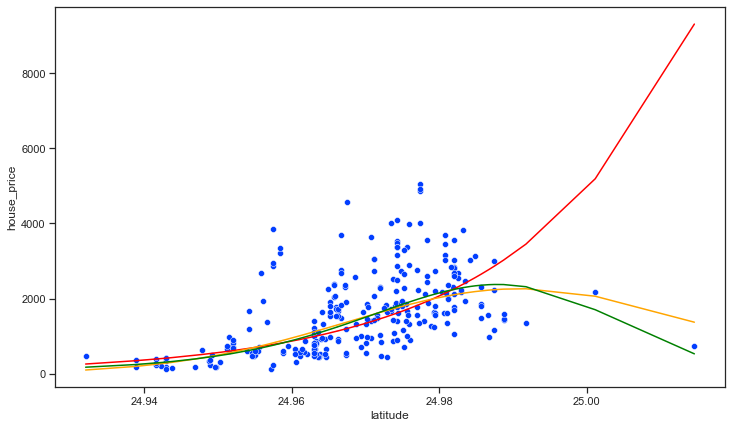

In [32]:
model = smf.ols('np.log(house_price) ~ latitude', data = train).fit()
sns.scatterplot(x = "latitude", y = "house_price", data = train)
sns.lineplot(x = "latitude", y =  np.exp(model.predict(train)), data = train, color = "red")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ latitude + I(latitude**2)', data = train).fit()
sns.lineplot(x = "latitude", y =  np.exp(model.predict(train)), data = train, color = "orange")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ latitude + I(latitude**2) + I(latitude**3)', data = train).fit()
sns.lineplot(x = "latitude", y =  np.exp(model.predict(train)), data = train, color = "green")
print(model.rsquared)

0.0323699878817556
0.19141747743885018


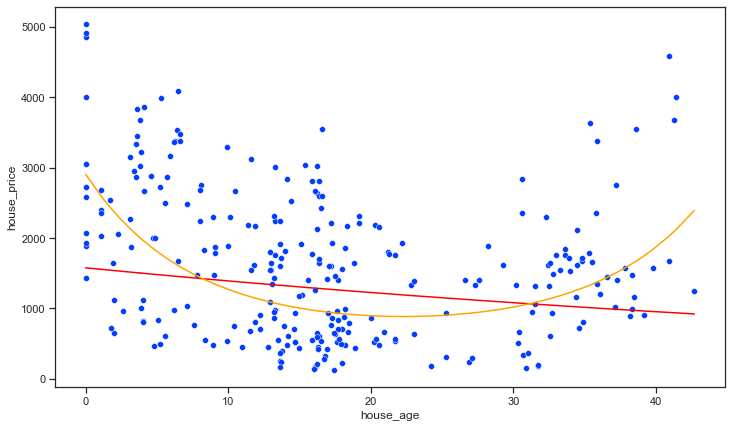

In [26]:
model = smf.ols('np.log(house_price) ~ house_age', data = train).fit()
sns.scatterplot(x = "house_age", y = "house_price", data = train)
sns.lineplot(x = "house_age", y =  np.exp(model.predict(train)), data = train, color = "red")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ house_age + I(house_age**2)', data = train).fit()
sns.lineplot(x = "house_age", y =  np.exp(model.predict(train)), data = train, color = "orange")
print(model.rsquared)

0.6439033121794568
0.6638201926362166


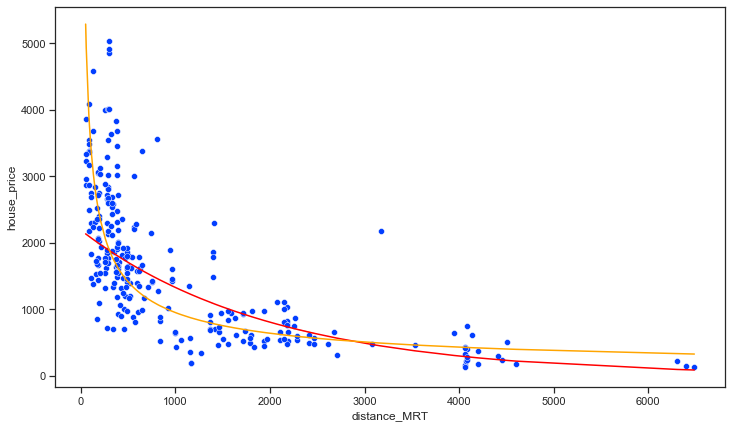

In [27]:
model = smf.ols('np.log(house_price) ~ distance_MRT', data = train).fit()
sns.scatterplot(x = "distance_MRT", y = "house_price", data = train)
sns.lineplot(x = "distance_MRT", y =  np.exp(model.predict(train)), data = train, color = "red")
print(model.rsquared)
model = smf.ols('np.log(house_price) ~ np.log(distance_MRT)', data = train).fit()
sns.lineplot(x = "distance_MRT", y =  np.exp(model.predict(train)), data = train, color = "orange")
print(model.rsquared)

#### (1g) 
Are the assumptions of linearity and constant variance of errors satisfied in the model developed in the previous question? Make the appropriate plot and use it to answer the question. 

*(3 points for visualization, 2 points for answer)*

## Part 2

The datasets `Austin_Affordable_Housing_Train.csv` and `Austin_Affordable_Housing_Test.csv` provide data on housing development projects that have received funding from the Affordable Housing Development Fund in Austin, Texas. The city provides property developers with tax credits and other forms of funding in exchange for agreements to set housing prices (e.g. rent) below market rate.

Each row represents a housing development in Austin. Variables include the amount (USD) provided by the city, the status of the housing project, the number of housing units, the period of affordability, and more. The data provided is a modification of an Affordable Housing Inventory found at https://data.austintexas.gov/Housing-and-Real-Estate/City-of-Austin-Affordable-Housing-Inventory/x5p7-qyuv.

Let's say that you're hired by the city as a consultant to work with subject matter experts in their Housing and Planning Department.

*General Hint:* For written sections, writing "it depends" (along with an explanation) often characterizes a good answer.

This part is worth 24 points overall.

#### (2a)

Suppose you run the line `status_vars = pd.get_dummies(housing_dataframe["Status"])`, append the columns of `status_vars` to your original data frame, and use the columns as predictors in a linear regression model. What potential problem would you likely be introducing into the model? How could it affect your results? 

*(2 points for answers)*

In [11]:
**As a result of this creating this column of dummy variables, we would create a column full of indicator variables from a categorical variable column. When introduced into a linear regression model, 

SyntaxError: invalid syntax (<ipython-input-11-b305934fa9b4>, line 1)

In [ ]:
housing_train

#### (2b)

Suppose that a subject matter expert recommends using the variables *Total_Units*, *Total_Affordable_Units*, *Total_Accessible_Units*, and *Market_Rate_Units* as predictors in your model. From a regression modeling standpoint, does this sound advisable? Produce metrics to quantify the potential impact of including the four predictors in a model. Interpret at least one of the metrics you provide, both statistically and in the context of the problem.

*(2 points for code, 2 points for answer)*

#### (2c)

Say that the subject matter expert agrees to use *Total_Affordable_Units*, *Affordability_Expiration_Year*, and *Units_Under_50_Percent_MFI* as predictors for *City_Amount*. Fit the appropriate model (without transformations). Then interpret the results associated with *Total_Affordable_Units*, as well as the overall model fit.

*(1 point for code, 2 points for answer)*

In [ ]:
#Creating and fitting model
ols_object = smf.ols(formula = 'City_Amount ~ Total_Affordable_Units + Affordability_Expiration_Year + Units_Under_50_Percent_MFI', data = housing_train)
model = ols_object.fit()
model.summary()

**In regards to the results related to the Total_Affordable_Units, for every increase of one (1) in Total_Affordable_Units, there is an increase of 22,610 in the City_Amount. Additionally, the overall model fit is just alright, but not great. I think this because the r-squared value for this particular model is 0.491 which denotes that only 49.1% of variation in the City_Amount variable is explained by the input variables.**

#### (2d)

Using visualizations, investigate whether the model you fit in (2c) yields outlying observations. What count and proportion of observations would you classify as outliers?

Note: Show separate plots for both - residuals and studentized residuals. However, consider studentized residuals when identifying outliers.

*(2 points for code, 1 point for answer)*

In [ ]:
#Residual Plot


In [ ]:
out = model.outlier_test()

#### (2e)

Based on your results in (2d), would you choose to remove outlying observations? Briefly, why or why not?

*(1 point for answer)*

#### (2f)

Consider a scenario in which the model will be used by property owners seeking to predict the amount of money they may receive from the city of Austin. How would this change, support, or complicate your answer in (2e), if at all?

*(1 point for answer)*

#### (2g)

Say that the model will be used by a team of sociologists seeking statistical evidence at the $\alpha = 0.01$ significance level that a property's affordability expiration year has an effect on the amount of money issued by the city of Austin? How would this change, support, or complicate your answer in (2e), if at all?

*(1 point for answer)*

#### (2h)

Determine whether the model you fit in (2c) contains any high-leverage points. Produce a visualization, then report the count and proportions of observations that are high-leverage (defining an observation as "high-leverage" if its leverage statistic is greater than four times the average leverage statistic). 

*(2 points for code, 1 point for answer)*

#### (2i)

Based on your results in (2h), would you choose to remove high-leverage observations? Briefly explain, why or why not?

*(1 point for answer)*

#### (2j)

Identify and remove any influential points from the training data and refit the model. How does removing influential affect the model, if at all?

Think about using the model summary, and the test data provided.

*(3 points for code, 2 points for answer)*